[[0.2020202  0.24242424 0.27272727 0.38888889 0.33333333 0.24747475]
 [0.24242424 0.27272727 0.38888889 0.33333333 0.24747475 0.1969697 ]
 [0.27272727 0.38888889 0.33333333 0.24747475 0.1969697  0.20707071]
 ...
 [0.31313131 0.28282828 0.26262626 0.24242424 0.24242424 0.22727273]
 [0.28282828 0.26262626 0.24242424 0.24242424 0.22727273 0.22222222]
 [0.26262626 0.24242424 0.24242424 0.22727273 0.22222222 0.25252525]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
17

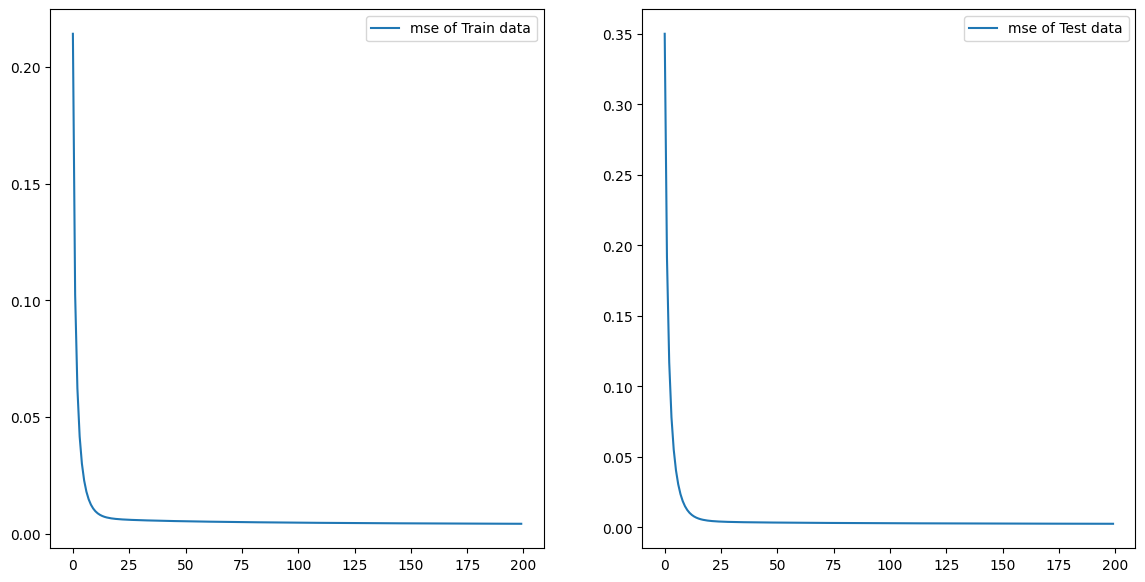

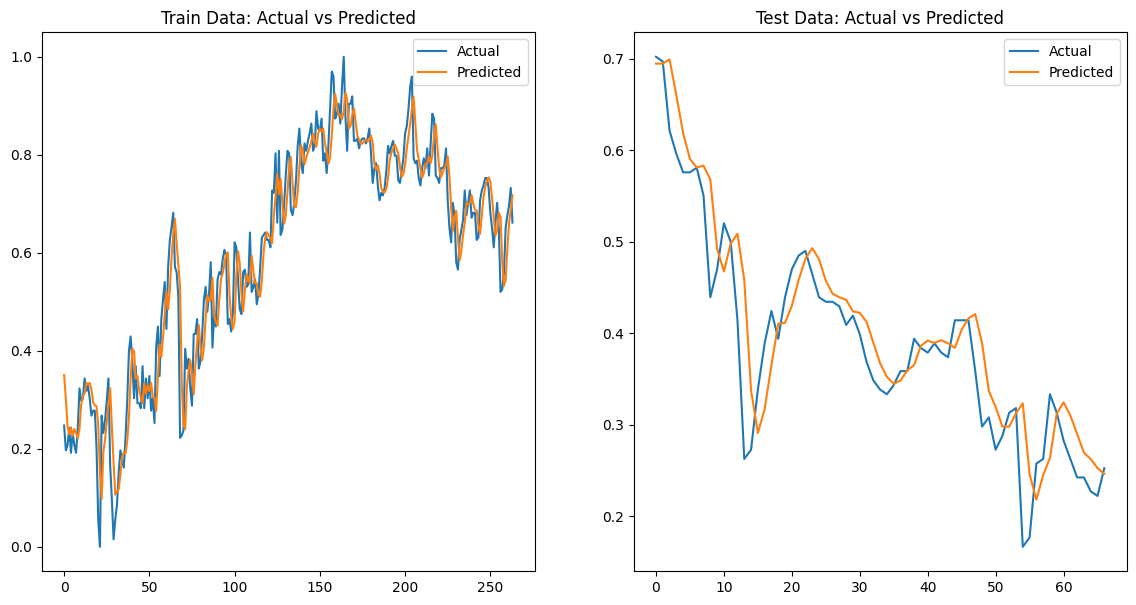

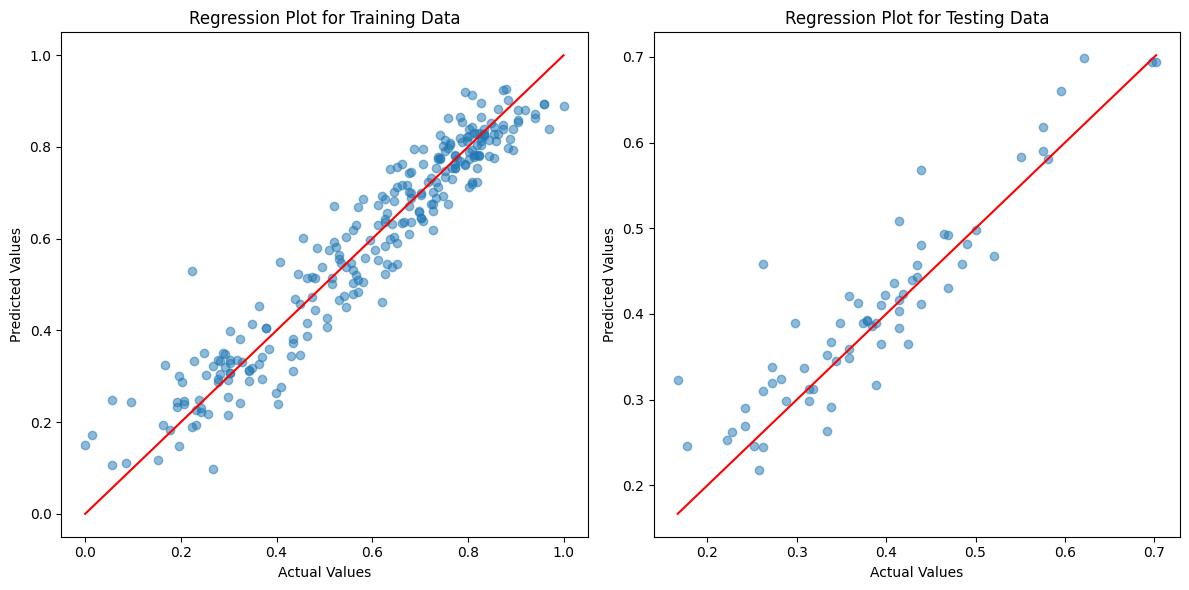

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(seed = 42)
# Load data from the Excel file
file_path = 'Temperature Dataset.xlsx'
df = pd.read_excel(file_path)

# Perform min-max normalization on column 'A'
min_value = df['A'].min()
max_value = df['A'].max()

df['A'] = (df['A'] - min_value) / (max_value - min_value)

# Create new columns for the next three time steps
df['B'] = df['A'].shift(-1)
df['C'] = df['A'].shift(-2)
df['D'] = df['A'].shift(-3)
df['E'] = df['A'].shift(-4)
df['F'] = df['A'].shift(-5)
# df['G'] = df['A'].shift(-6)
# df['H'] = df['A'].shift(-7)
# df['I'] = df['A'].shift(-8)

# Drop the rows with missing values (for the last three time steps)
df = df.dropna()

# Convert the DataFrame to a NumPy array
numpy_array = df.values

print(numpy_array)

# Sigmoid and tanh activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(output):
    return output * (1 - output)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(output):
    return 1 - output ** 2

# Mean Squared Error loss and its derivative
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_loss_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.Wf_forward = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wi_forward = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wo_forward = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wc_forward = np.random.randn(hidden_size, hidden_size + input_size)
        self.bf_forward = np.zeros(hidden_size)
        self.bi_forward = np.zeros(hidden_size)
        self.bo_forward = np.zeros(hidden_size)
        self.bc_forward = np.zeros(hidden_size)

        self.Wf_backward = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wi_backward = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wo_backward = np.random.randn(hidden_size, hidden_size + input_size)
        self.Wc_backward = np.random.randn(hidden_size, hidden_size + input_size)
        self.bf_backward = np.zeros(hidden_size)
        self.bi_backward = np.zeros(hidden_size)
        self.bo_backward = np.zeros(hidden_size)
        self.bc_backward = np.zeros(hidden_size)

        self.Wy = np.random.randn(1, 2 * hidden_size)
        self.by = np.zeros(1)

    def forward_forward_layer(self, x_forward, h_prev_forward, c_prev_forward):
        self.x, self.h_prev_forward, self.c_prev_forward = x_forward, h_prev_forward, c_prev_forward
        self.combined_forward = np.hstack((h_prev_forward, self.x))
        self.f_forward = sigmoid(np.dot(self.Wf_forward, self.combined_forward) + self.bf_forward)
        self.i_forward = sigmoid(np.dot(self.Wi_forward, self.combined_forward) + self.bi_forward)
        self.o_forward = sigmoid(np.dot(self.Wo_forward, self.combined_forward) + self.bo_forward)
        self.c_hat_forward = tanh(np.dot(self.Wc_forward, self.combined_forward) + self.bc_forward)
        self.c_forward = self.f_forward * c_prev_forward + self.i_forward * self.c_hat_forward
        self.h_forward = self.o_forward * tanh(self.c_forward)
        return self.h_forward, self.c_forward

    def forward_backward_layer(self, x_backward, h_prev_backward, c_prev_backward):
        self.x, self.h_prev_backward, self.c_prev_backward = x_backward, h_prev_backward, c_prev_backward
        self.combined_backward = np.hstack((h_prev_backward, self.x))
        self.f_backward = sigmoid(np.dot(self.Wf_backward, self.combined_backward) + self.bf_backward)
        self.i_backward = sigmoid(np.dot(self.Wi_backward, self.combined_backward) + self.bi_backward)
        self.o_backward = sigmoid(np.dot(self.Wo_backward, self.combined_backward) + self.bo_backward)
        self.c_hat_backward = tanh(np.dot(self.Wc_backward, self.combined_backward) + self.bc_backward)
        self.c_backward = self.f_backward * c_prev_backward + self.i_backward * self.c_hat_backward
        self.h_backward = self.o_backward * tanh(self.c_backward)
        return self.h_backward, self.c_backward

    def forward(self, h_backward, h_forward):
        self.y_pred = np.dot(self.Wy, np.concatenate([h_backward, h_forward])) + self.by
        return self.y_pred

    def backward_forwardLayer(self, dL_dy, dh_next_forward, dc_next_forward, learning_rate):
        dy_dh = self.Wy[:, hidden_size:]
        dh = np.dot(dy_dh.T, dL_dy) + dh_next_forward
        dc = dh * self.o_forward * tanh_derivative(tanh(self.c_forward)) + dc_next_forward

        df = dc * self.c_prev_forward * sigmoid_derivative(self.f_forward)
        di = dc * self.c_hat_forward * sigmoid_derivative(self.i_forward)
        do = dh * tanh(self.c_forward) * sigmoid_derivative(self.o_forward)
        dc_hat = dc * self.i_forward * tanh_derivative(self.c_hat_forward)

        dWf = np.dot(df.reshape(-1, 1), self.combined_forward.reshape(1, -1))
        dWi = np.dot(di.reshape(-1, 1), self.combined_forward.reshape(1, -1))
        dWo = np.dot(do.reshape(-1, 1), self.combined_forward.reshape(1, -1))
        dWc = np.dot(dc_hat.reshape(-1, 1), self.combined_forward.reshape(1, -1))

        dbf = df
        dbi = di
        dbo = do
        dbc = dc_hat

        # Update weights and biases
        self.Wf_forward -= learning_rate * dWf
        self.Wi_forward -= learning_rate * dWi
        self.Wo_forward -= learning_rate * dWo
        self.Wc_forward -= learning_rate * dWc
        self.bf_forward -= learning_rate * dbf
        self.bi_forward -= learning_rate * dbi
        self.bo_forward -= learning_rate * dbo
        self.bc_forward -= learning_rate * dbc

        dcombined = np.dot(self.Wf_forward.T, df) + np.dot(self.Wi_forward.T, di) + np.dot(self.Wo_forward.T, do) + np.dot(self.Wc_forward.T, dc_hat)
        dh_prev = dcombined[:self.hidden_size]
        dc_prev = dc * self.f_forward

        return dh_prev, dc_prev

    def backward_backwardLayer(self, dL_dy, dh_next_backward, dc_next_backward, learning_rate):
        dy_dh = self.Wy[:, :hidden_size]
        dh = np.dot(dy_dh.T, dL_dy) + dh_next_backward
        dc = dh * self.o_backward * tanh_derivative(tanh(self.c_backward)) + dc_next_backward

        df = dc * self.c_prev_backward * sigmoid_derivative(self.f_backward)
        di = dc * self.c_hat_backward * sigmoid_derivative(self.i_backward)
        do = dh * tanh(self.c_backward) * sigmoid_derivative(self.o_backward)
        dc_hat = dc * self.i_backward * tanh_derivative(self.c_hat_backward)

        dWf = np.dot(df.reshape(-1, 1), self.combined_backward.reshape(1, -1))
        dWi = np.dot(di.reshape(-1, 1), self.combined_backward.reshape(1, -1))
        dWo = np.dot(do.reshape(-1, 1), self.combined_backward.reshape(1, -1))
        dWc = np.dot(dc_hat.reshape(-1, 1), self.combined_backward.reshape(1, -1))

        dbf = df
        dbi = di
        dbo = do
        dbc = dc_hat

        # Update weights and biases
        self.Wf_backward -= learning_rate * dWf
        self.Wi_backward -= learning_rate * dWi
        self.Wo_backward -= learning_rate * dWo
        self.Wc_backward -= learning_rate * dWc
        self.bf_backward -= learning_rate * dbf
        self.bi_backward -= learning_rate * dbi
        self.bo_backward -= learning_rate * dbo
        self.bc_backward -= learning_rate * dbc

        dcombined = np.dot(self.Wf_backward.T, df) + np.dot(self.Wi_backward.T, di) + np.dot(self.Wo_backward.T, do) + np.dot(self.Wc_backward.T, dc_hat)
        dh_prev = dcombined[:self.hidden_size]
        dc_prev = dc * self.f_backward

        return dh_prev, dc_prev

    def backward(self, dL_dy):
        dWy = np.dot(dL_dy, np.concatenate([self.h_backward, self.h_forward]).reshape(1, -1))
        dby = dL_dy

        self.Wy -= learning_rate * dWy
        self.by -= learning_rate * dby.reshape(-1)

# Continued setup: Initialize LSTM cell, prepare data, and define training/testing parameters
input_size = 1
hidden_size = 4
timesteps = 1000
learning_rate = 0.001
sequence_length = 4
epochs = 200

# Initialize LSTM cell with extended functionalities
lstm_cell = LSTMCell(input_size, hidden_size)

# Split data into input X and output Y
X = numpy_array[:, :-1]  # All rows, all but last column
Y = numpy_array[:, -1]   # All rows, only last column

# Assuming a simple train-test split
split_index = int(0.8 * len(X))
X_train_seq, Y_train_seq = X[:split_index], Y[:split_index]
X_test_seq, Y_test_seq = X[split_index:], Y[split_index:]

# Lists to store predictions
train_predictions = []
test_predictions = []

mse_test = []
mse_train = []

h_forward_train, c_forward_train = np.zeros(hidden_size), np.zeros(hidden_size)  # Reset states at the start of each epoch
h_backward_train, c_backward_train = np.zeros(hidden_size), np.zeros(hidden_size)

h_forward_test, c_forward_test = np.zeros(hidden_size), np.zeros(hidden_size)  # Reset states at the start of each epoch
h_backward_test, c_backward_test = np.zeros(hidden_size), np.zeros(hidden_size)

for epoch in range(epochs):
    print(epoch)

    sqr_train = []
    # Training loop
    for t in range(len(X_train_seq)):
        x_seq, y_true = X_train_seq[t], Y_train_seq[t]

        for x in x_seq:
            h_forward_train, c_forward_train = lstm_cell.forward_forward_layer(x, h_forward_train, c_forward_train)

        for x in x_seq.T:
            h_backward_train, c_backward_train = lstm_cell.forward_backward_layer(x, h_backward_train, c_backward_train)

        y_pred = lstm_cell.forward(h_backward_train, h_forward_train)
        if epoch == epochs - 1:
            train_predictions.append(y_pred.item())
        sqr_train.append((y_true - y_pred) ** 2)
        dL_dy = mse_loss_derivative(y_true, y_pred)

        dh_next_forward = np.zeros_like(h_forward_train)
        dc_next_forward = np.zeros_like(c_forward_train)

        dh_next_backward = np.zeros_like(h_backward_test)
        dc_next_backward = np.zeros_like(c_backward_test)

        for x in reversed(x_seq):
            dh_prev_forward, dc_prev_forward = lstm_cell.backward_forwardLayer(dL_dy, dh_next_forward, dc_next_forward, learning_rate)
            dh_next_forward, dc_next_forward = dh_prev_forward, dc_prev_forward

        for x in reversed(x_seq.T):
            dh_prev_backward, dc_prev_backward = lstm_cell.backward_backwardLayer(dL_dy, dh_next_backward, dc_next_backward, learning_rate)
            dh_next_backward, dc_next_backward = dh_prev_backward, dc_prev_backward

        lstm_cell.backward(dL_dy)
    mse_train.append(np.mean(sqr_train))

    # Testing loop (No backpropagation)
    sqr_test = []
    for t in range(len(X_test_seq)):
        x_seq, y_true = X_test_seq[t], Y_test_seq[t]

        for x in x_seq:
            h_forward_test, c_forward_test = lstm_cell.forward_forward_layer(x, h_forward_test, c_forward_test)

        for x in x_seq.T:
            h_backward_test, c_backward_test = lstm_cell.forward_backward_layer(x, h_backward_test, c_backward_test)

        y_pred = lstm_cell.forward(h_backward_test, h_forward_test)
        if epoch == epochs - 1:
            test_predictions.append(y_pred.item())
        sqr_test.append((y_true - y_pred) ** 2)
    mse_test.append(np.mean(sqr_test))

print(mse_loss(test_predictions, Y_test_seq))

# Plotting mse for train data
plt.figure(figsize = (14, 7))
plt.subplot(1, 2, 1)
plt.plot(mse_train, label = 'mse of Train data')
plt.legend()

# Plotting mse for test data
plt.subplot(1, 2, 2)
plt.plot(mse_test, label = 'mse of Test data')
plt.legend()

plt.show()

# Plotting train predictions vs actual data
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(Y_train_seq)), Y_train_seq, label="Actual")
plt.plot(np.arange(len(train_predictions)), train_predictions, label="Predicted", linestyle='-')
plt.title("Train Data: Actual vs Predicted")
plt.legend()

# Plotting test predictions vs actual data
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(Y_test_seq)), Y_test_seq, label="Actual")
plt.plot(np.arange(len(test_predictions)), test_predictions, label="Predicted", linestyle='-')
plt.title("Test Data: Actual vs Predicted")
plt.legend()

plt.show()

# Assuming 'train_predictions' and 'test_predictions' contain the predictions from the LSTM model,
# and 'Y_train_seq' and 'Y_test_seq' contain the actual values.

# Plot regression for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(Y_train_seq, train_predictions, alpha=0.5)
plt.title("Regression Plot for Training Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(Y_train_seq), max(Y_train_seq)], [min(Y_train_seq), max(Y_train_seq)], color='red') # Line showing perfect prediction

# Plot regression for testing data
plt.subplot(1, 2, 2)
plt.scatter(Y_test_seq, test_predictions, alpha=0.5)
plt.title("Regression Plot for Testing Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([min(Y_test_seq), max(Y_test_seq)], [min(Y_test_seq), max(Y_test_seq)], color='red') # Line showing perfect prediction

plt.tight_layout()
plt.show()
